In [ ]:
#Importing various libraries at time

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df=pd.read_csv("C:/Users/rohan/Desktop/Regression_model/FuelConsumption1.csv")

In [82]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [84]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [85]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [86]:
df.FUELTYPE.value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [87]:
X=df[['ENGINESIZE', 'CYLINDERS', 'FUELTYPE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
X[0:5]

array([[2.0, 4, 'Z', 8.5, 33],
       [2.4, 4, 'Z', 9.6, 29],
       [1.5, 4, 'Z', 5.9, 48],
       [3.5, 6, 'Z', 11.1, 25],
       [3.5, 6, 'Z', 10.6, 27]], dtype=object)

In [88]:
y=df[['CO2EMISSIONS']].values
y[0:5]

array([[196],
       [221],
       [136],
       [255],
       [244]], dtype=int64)

In [89]:
from sklearn import preprocessing
le_fueltype=preprocessing.LabelEncoder()
le_fueltype.fit(['X','Z','E','D'])
X[:,2]=le_fueltype.transform(X[:,2])
X[0:5]

array([[2.0, 4, 3, 8.5, 33],
       [2.4, 4, 3, 9.6, 29],
       [1.5, 4, 3, 5.9, 48],
       [3.5, 6, 3, 11.1, 25],
       [3.5, 6, 3, 10.6, 27]], dtype=object)

In [90]:
from sklearn.linear_model import LinearRegression
regrLinear=LinearRegression()
Linear_model=regrLinear.fit(X,y)
print("Linear_Coefficient",regrLinear.coef_)
print("Linear_Intercept:",regrLinear.intercept_)


Linear_Coefficient [[ 9.19337641  4.94995344  7.98407776  5.36981532 -3.04376671]]
Linear_Intercept: [196.95230304]


In [93]:
print(regrLinear.predict(X))

[[204.29023168]
 [226.04944593]
 [140.07552299]
 ...
 [260.51372814]
 [256.62372905]
 [273.80975216]]


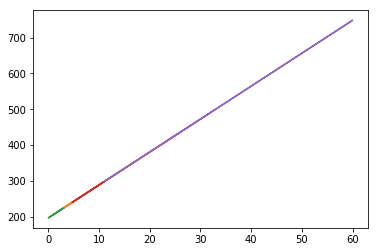

In [57]:
plt.plot(X,regrLinear.coef_[0][0]*X +regrLinear.intercept_[0])
plt.show()

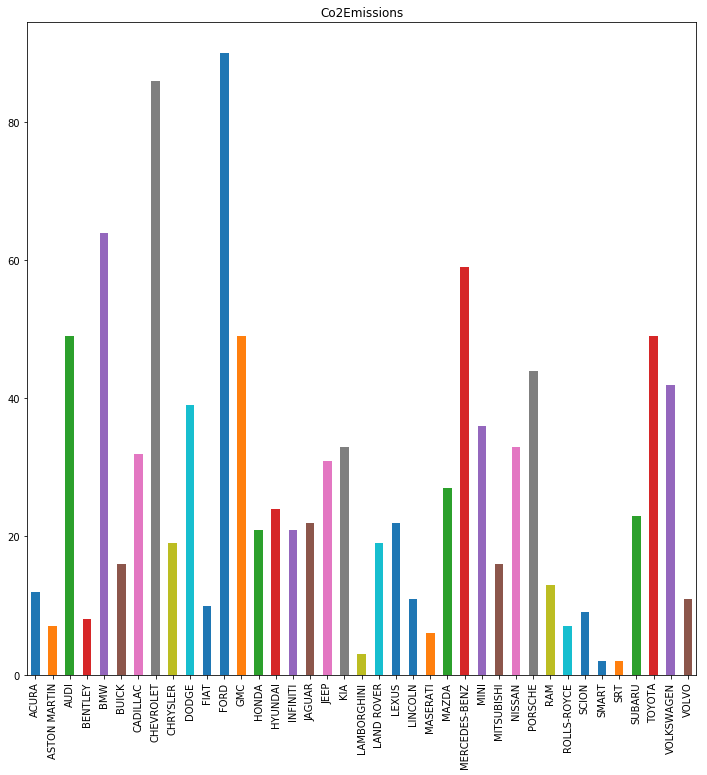

In [63]:
df['MAKE'].value_counts().sort_index().plot.bar(figsize=(12,12),title='Make')

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64


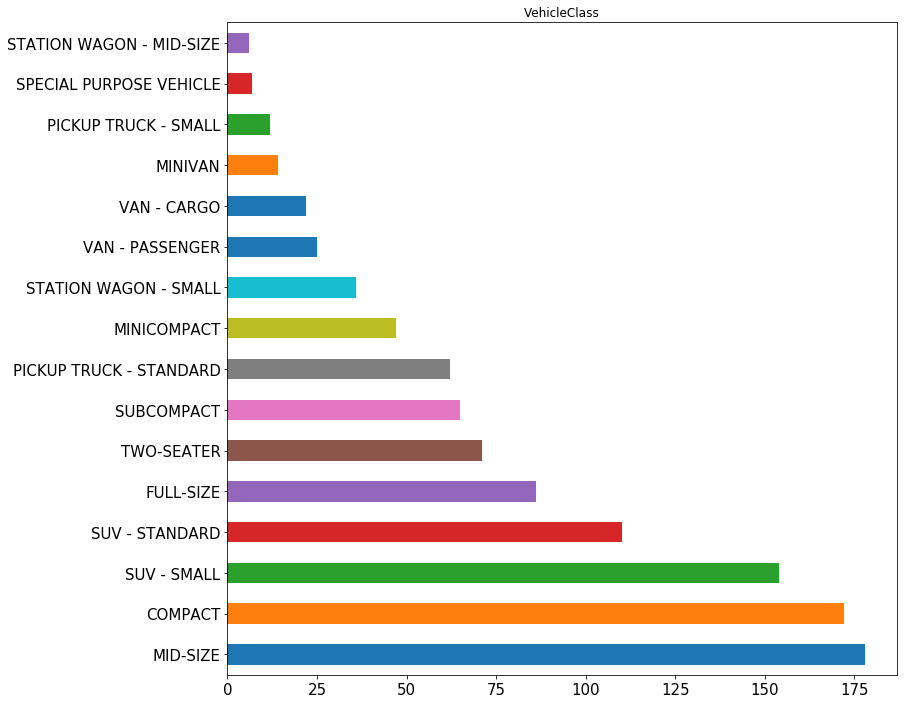

In [67]:
df['VEHICLECLASS'].value_counts().plot.barh(figsize=(12,12),title="VehicleClass",fontsize=15)
print(df['VEHICLECLASS'].value_counts())

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64


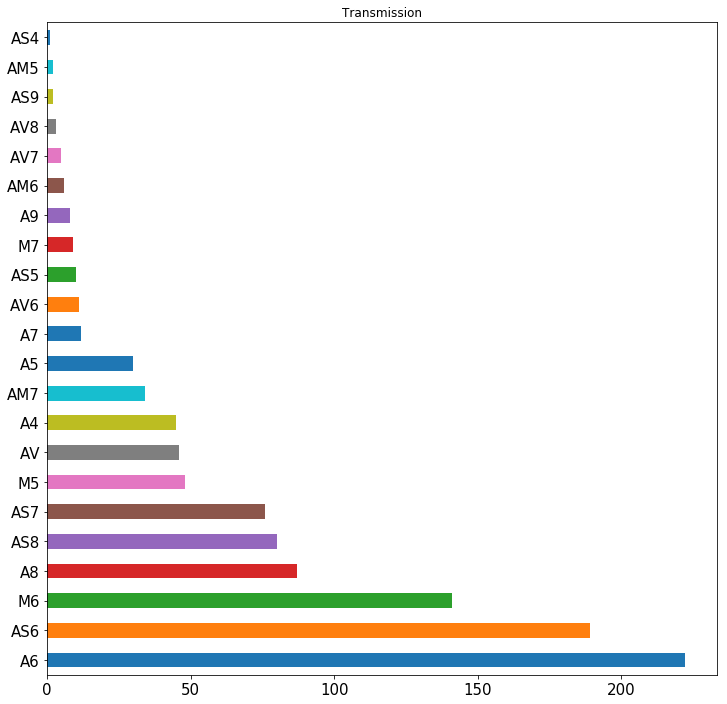

In [68]:
df['TRANSMISSION'].value_counts().plot.barh(figsize=(12,12),title="Transmission",fontsize=15)
print(df['TRANSMISSION'].value_counts())

In [76]:
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [99]:
from sklearn.metrics import r2_score
r2_score(y,regrLinear.predict(X))

0.8943207644529637

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,regrLinear.predict(X))

13.96346119380645

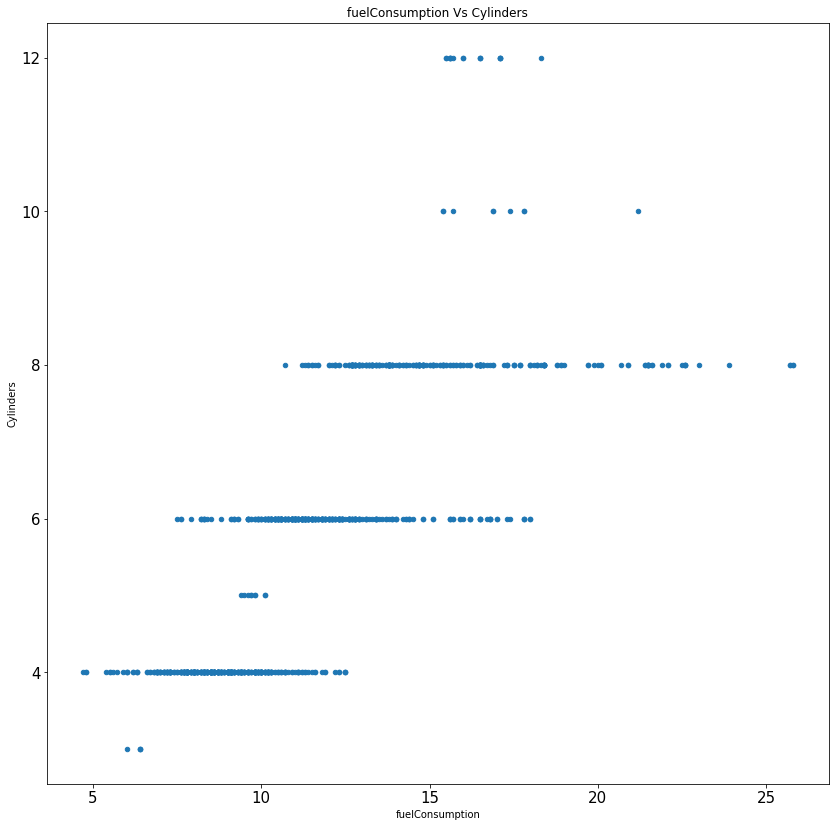

In [102]:
df[df['FUELCONSUMPTION_COMB']<30].plot.scatter(x='FUELCONSUMPTION_COMB',y='CYLINDERS',figsize=(14,14),fontsize=15,title='fuelConsumption Vs Cylinders')
plt.xlabel('fuelConsumption')
plt.ylabel('Cylinders')
plt.show()